# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2024)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 01.02.2024


### Erster Vorlesungsteil:  
#### Evolutionäre Spieltheorie symmetrischer ($2\times2$)-Spiele


## Einführung

In diesem Python Notebook werden die Grundlagen der evolutionären Spieltheorie vorgestellt und die zeitabhängigen Lösungen symmetrischer (2 Spieler)-(2 Strategien) Spiele berechnet. 
Zunächst wird das Python Modul "sympy" eingebunden, das ein Computer-Algebra-System für Python bereitstellt und symbolische Berechnungen und im speziellen Matrix-Berechnungen relativ einfach möglich macht.

In [1]:
from sympy import *
init_printing()

## Die Gleichungen der evolutionären Dynamik
Die evolutionäre Spieltheorie untersucht das zeitliche Verhalten einer gro&szlig;en Anzahl von individuellen Spielern, der sogenannten Population (siehe [1,2,3,4]). Wir nehmen im folgenden zunächst an, dass die Population aus einer unendlichen Anzahl von individuellen Spieler besteht, die sich aus zwei separaten, unterscheidbaren Gruppen (A und B) zusammensetzt. Gegeben sei die strategische Form eines, zunächst noch unsymmetrischen (2 Personen)-(m Strategien) Spiels $\Gamma$. $x^\mu_i(t)$ ($i=1, 2, ..., m_\mu$ und $\mu=A,B$) seien die zeitabhängigen, gemittelten Anteile der Spieler innerhalb der Spielergruppe $\mu=A,B$, die die Strategie i wählen. Diese gruppenspezifischen Populationsvektoren ($\vec{x}^A(t)=(x^A_1(t), x^A_2(t), ..., x^A_{m_A}(t))$ und $\vec{x}^B(t)=(x^B_1(t), x^B_2(t), ..., x^B_{m_B}(t))$) unterliegen folgenden Normalisierungsbedingungen:
$$
\begin{eqnarray}
x^\mu_i(t) \geq  0 \quad \mbox{und} \quad \sum_{i=1}^{m_\mu} x^\mu_i(t) = 1 \quad 
\forall \,\, i=1, 2, ..., m_\mu \,\, , \,\, t \in R; , \,\, \mu=A, B 
\end{eqnarray}
$$
Die gesamte Population spielt zu jedem Zeitpunkt das gleiche Spiel, wobei sich die einzelnen Spieler der Gruppe A mit Spielern der Gruppe B zufällig paaren, das simultane Spiel spielen, ihre erzielten Auszahlungen erhalten und dann erneut zufällig paaren. Eine Miteinbeziehung von zugrundeliegenden komplexen Netzwerkstrukturen, die eine nicht-zufällige Paarung in die Beschreibung mitaufnehmen, bzw. die Betrachtung einer endlichen Spielerpopulation erfordert meist eine nicht analytische, nummerisch simulative Beschreibung; dies wird Gegenstand der Untersuchungen im Teil II und Teil III dieser Vorlesung sein.<br>

Die zeitliche Veränderung der Populationsvektoren $\vec{x}^A(t)$ und $\vec{x}^B(t)$ spiegelt die in der Gruppe vorherrschende Strategienwahl zum Zeitpunkt $t$ wider und beschreibt demnach die evolutionäre Dynamik der interagierenden Menschengruppen. Die ma&szlig;geblichen Faktoren, die die evolutionäre Entwicklung bestimmen, sind der Soziobiologie entnommen und basieren auf Reproduktion, Mutation und Selektion der Strategienentscheidungen. Die zugrundeliegende mathematische Beschreibung lehnt sich an die, in der theoretischen Biologie verwendete, sogenannte <i>Quasispezies-Gleichung</i> (siehe [1], S: 33) an und ist ein System nichtlinearer Differenzialgleichungen erster Ordnung in der Zeit. Für das zuvor definierte evolutionäre Spiel besitzt die Differenzialgleichung das folgende Aussehen:
$$
\begin{eqnarray}
\frac{d \vec{x}^A}{dt} &=&  \hat{\bf x}^A \left( \hat{\bf {\cal \$}}^A\,\vec{x}^B \right) -  \left(\left(\hat{\bf {\cal \$}}^A\,\vec{x}^B \right)^T \vec{x}^A \right) \vec{x}^A \\
\frac{d \vec{x}^B}{dt} &=& \hat{\bf x}^B \left( \hat{\bf {\cal \$}}^B\,\vec{x}^A \right) -  \left(\left(\hat{\bf {\cal \$}}^B\,\vec{x}^A \right)^T \vec{x}^B \right) \vec{x}^B  \quad ,
\end{eqnarray}
$$
wobei $\hat{\bf x}^\mu:={\rm diag\!}\left( x^\mu_1(t), x^\mu_2(t), ..., x^\mu_{m_\mu}(t)  \right)$ bzw. in expliziter Formulierung:
$$
\begin{eqnarray}
\frac{d x^A_i(t)}{dt} &=&   \left[ \underbrace{\sum_{l=1}^{m_{\small B}} \$^A_{il} \, x^B_l(t)}_{\hbox{Fitness der Strategie i}} - 
\underbrace{\sum_{l=1}^{m_{\small B}} \sum_{k=1}^{m_{\small A}} \$^A_{kl} \, x^A_k(t) \, x^B_l(t)}_{\hbox{Durchschn. Fitness der Population A}} \right] \, x^A_i(t) \qquad \hbox{(1)}\\
\frac{d x^B_j(t)}{dt} &=&  \left[ \underbrace{\sum_{l=1}^{m_{\small A}} \$^B_{lj} \, x^A_l(t)}_{\hbox{Fitness der Strategie j}} - 
\underbrace{\sum_{l=1}^{m_{\small A}} \sum_{k=1}^{m_{\small B}} \$^B_{lk} \, x^A_l(t) \, x^B_k(t)}_{\hbox{Durchschn. Fitness der Population B}} \right] \, x^B_j(t) \quad ,
\end{eqnarray}
$$
wobei $x^A_i(t), \, i=1, 2, ...,m_{\small A}$ und $x^B_j(t), \, j=1, 2, ...,m_{\small B}$ die Anteile der in den Spielergruppen A und B zur Zeit $t$ gewählten Strategien widerspiegeln und in der Soziobiologie den Frequenzen der <i>Quasispezies</i> entsprechen.<br>

Wir beschränken uns im folgenden auf den 2-Strategien Fall ($m_{\small A}=m_{\small B}=2$), lassen jedoch weiter eine Unsymmetrie der Auszahlungsmatrix zu. 

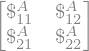

In [2]:
Aa,Ab,Ac,Ad = symbols('\$^A_{11},\$^A_{12},\$^A_{21},\$^A_{22}')
D_A = Matrix([[Aa,Ab],[Ac,Ad]])
D_A

Da sich das Spiel zunächst allgemein um ein unsymmetrisches evolutionäres (2 Personen)-(2 Strategien) Spiel handelt, definieren wir die Matrix für Spieler B separat.

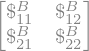

In [3]:
Ba,Bb,Bc,Bd = symbols('\$^B_{11},\$^B_{12},\$^B_{21},\$^B_{22}')
D_B = Matrix([[Ba,Bb],[Bc,Bd]])
D_B

Die Populationsvektoren $\vec{x}^A(t)$ und $\vec{x}^B(t)$ sind bei dem ($2\times2$)-Spiel zweidimensionale Vektoren:

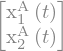

In [4]:
t = symbols('t')
xA1 = Function('x^A_1')(t)
xA2 = Function('x^A_2')(t)
x_A = Matrix([xA1,xA2])
x_A

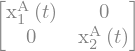

In [5]:
Mx_A = diag(xA1,xA2)
Mx_A

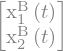

In [6]:
xB1 = Function('x^B_1')(t)
xB2 = Function('x^B_2')(t)
x_B = Matrix([xB1,xB2])
x_B

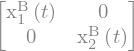

In [7]:
Mx_B = diag(xB1,xB2)
Mx_B

Wir definieren die Fitness der Strategien für Spielergruppe A und B (hier nur für A ausgegeben)

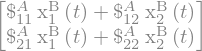

In [8]:
FitA = D_A*x_B
FitB = D_B*x_A
FitA

Wir definieren die durchschnittliche Fitness der Spielergruppe A und B (hier nur für A ausgegeben)

In [9]:
AverageFitA = transpose(D_A*x_B)*x_A
AverageFitB = transpose(D_B*x_A)*x_B
AverageFitA[0]

Die Differenzialgleichung für Spielergruppe A besitzt somit die folgende Gestalt:

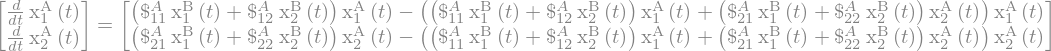

In [10]:
DiffA = Eq(x_A.diff(t),Mx_A*FitA-AverageFitA[0]*x_A)
DiffA

Die Differenzialgleichung für Spielergruppe B:

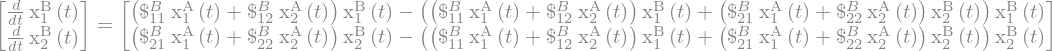

In [11]:
DiffB = Eq(x_B.diff(t),Mx_B*FitB-AverageFitB[0]*x_B)
DiffB

Dieses System von gekoppelten, nichtlinearen Differenzialgleichungen läßt sich noch weiter vereinfachen. Die beiden Komponenten der zweidimensionalen gruppenspezifischen Populationsvektoren lassen sich, aufgrund ihrer Normalisierungsbedingung, auf eine Komponente reduzieren ($x^A_2=1-x^A_1$ und $x^B_2=1-x^B_1$). Das zeitliche Verhalten der Komponenten der Populationsvektoren (Gruppe A: $x(t):=x^A_1(t)$ und Gruppe B: $y(t):=x^B_1(t)$) wird in der Reproduktionsdynamik mittels des folgenden Systems von Differenzialgleichungen beschrieben: 
$$
\begin{eqnarray}
\frac{d x(t)}{dt} &=& \left[ 
\left( \$^A_{11} + \$^A_{22} - \$^A_{12} - \$^A_{21} \right) \,y(t) + \left( \$^A_{12} - \$^A_{22}\right) \right] \,\left( x(t) - \left( x(t) \right)^2 \right) \, =: \, g_A(x,y) \qquad \hbox{(2)}\\
\frac{d y(t)}{dt} &=&  \left[ \left( \$^B_{11} + \$^B_{22} - \$^B_{12} - \$^B_{21} \right) \,x(t) + \left( \$^B_{12} - \$^B_{22}\right) \right] \,\left( y(t) - \left( y(t) \right)^2 \right) \, =: \,  g_B(x,y) 
\end{eqnarray}
$$

In [12]:
x = Function('x')(t)
y = Function('y')(t)

Durch Substitution erhält man die folgenden beiden gekoppelten Differenzialgleichungen

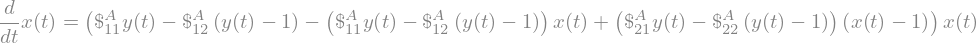

In [13]:
DiffAa = Eq(x.diff(t),simplify(DiffA.rhs[0].subs([(xA1,x), (xA2,1-x), (xB1,y), (xB2,1-y)])))
DiffAa

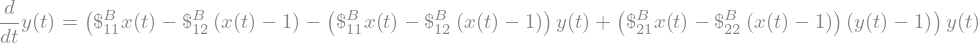

In [14]:
DiffBa = Eq(y.diff(t),simplify(DiffB.rhs[0].subs([(xA1,x), (xA2,1-x), (xB1,y), (xB2,1-y)])))
DiffBa

Nimmt man zusätzlich ein symmetrisches Spiel an ($\hat{\bf {\cal \$}} := \hat{\bf {\cal \$}}^A = \left( \hat{\bf {\cal \$}}^B \right)^{\!T}$), in welchem die Auszahlungswerte (Fitness-Werte) der Populationsgruppen gleich sind, so kann man die beiden Gruppen von ihrer mathematischen Struktur her als ununterscheidbare Spielergruppen mit identischen Populationsvektoren $x(t)=y(t)$ annehmen. Die Differenzialgleichung schreibt sich dann wie folgt:

$$
\begin{equation}
\frac{d x(t)}{dt} = \left[ (\$_{11} -  \$_{21}) (x-x^2) + (\$_{12} - \$_{22}) (1-2x+x^2) \right] \, x(t) \, =:\,g(x) 
\end{equation}
$$

Verallgemeinert man diese Differenzialgleichung wieder auf mehr als zwei Strategien, so kann man abkürzend die folgende Formulierung schreiben:
$$
\begin{equation}
\frac{d \vec{x}}{dt} = \hat{\bf x} \left( \hat{\bf {\cal \$}}\,\vec{x} \right) -  \left(\left(\hat{\bf {\cal \$}}\,\vec{x} \right)^T \vec{x} \right) \vec{x}
\end{equation}
$$

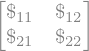

In [15]:
a,b,c,d = symbols('\$_{11},\$_{12},\$_{21},\$_{22}')
D = Matrix([[a,b],[c,d]])
D

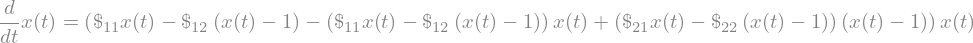

In [16]:
DGL = Eq(x.diff(t),simplify(DiffAa.rhs.subs([(Aa,a), (Ab,b), (Ac,c), (Ad,d), (y,x)])))
DGL

Diese Differenzialgleichung lässt sich für einfache Spiele analytisch lösen. Wir betrachten die folgende Auszahlungsmatrix:

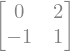

In [17]:
D.subs([(a,0), (b,2), (c,-1), (d,1)])

Die Differenzialgleichung lautet

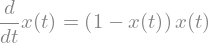

In [18]:
DGLsimple = simplify(DGL.subs([(a,0), (b,2), (c,-1), (d,1)]))
DGLsimple

und besitzt die allgemeine Lösung:

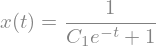

In [19]:
dsolve(DGLsimple)

Nimmt man an, dass nur 10% der Population zum Zeitpunkt t=0 die Strategie 1 spielt (Anfangsbedingung x(0)=0.1), so lautet die Lösung der evolutionären Spieltheorie:

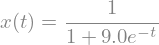

In [20]:
LoesAnalytic = dsolve(DGLsimple,ics={x.subs(t,0):0.1})
LoesAnalytic

Die Lösung kann man wie folgt darstellen:

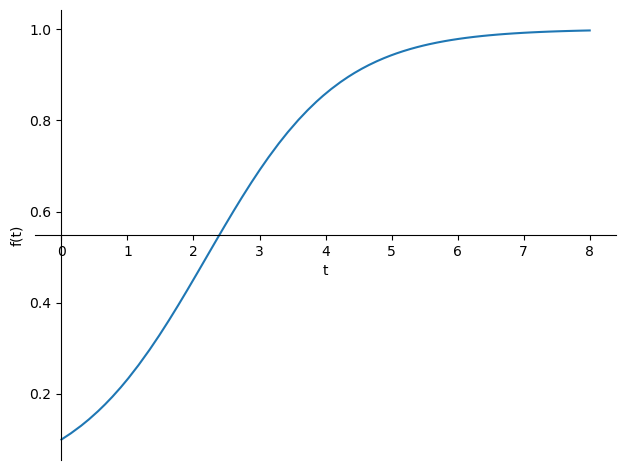

In [21]:
plot(LoesAnalytic.rhs, (t, 0, 8));

Alternativ können wir die Lösung auch mit Matplotlib darstellen, wobei man hierbei zunächst den analytischen Ausdruck der Lösungsfunktion in eine numerische Funktion umwandelt.

In [22]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
params = {
    'figure.figsize'    : [8,5],
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

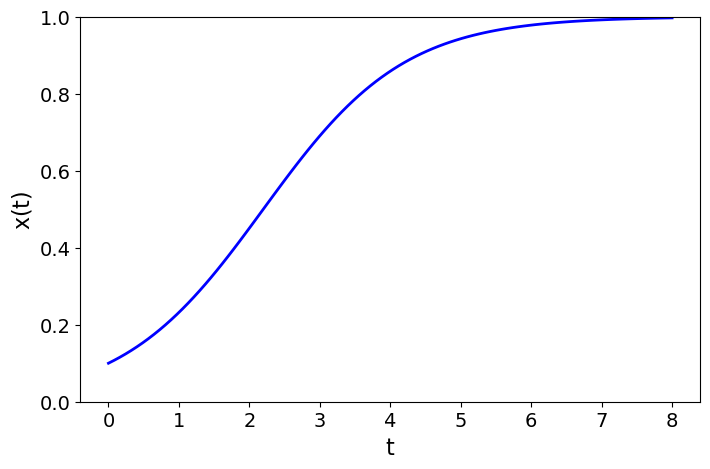

In [23]:
t_werte = np.linspace(0, 8, 100)
Loes_l = lambdify(t, LoesAnalytic.rhs)
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm x(t)$");
plt.ylim(0,1)
plt.plot(t_werte,Loes_l(t_werte),color='blue', linewidth=2, linestyle='-');